# Parks

## Description
We utilized the parks dataset to assess the number of parks or recreational facilities in each neighborhood in Pittsburgh, assuming that better neighborhoods have more parks. Again, we utilized the value_counts() function to count the number of parks for each unique neighborhood in the dataset. Subsequently, we applied the sort_values() function to rank the neighborhoods based on their relative recreation levels.

In [5]:
import pandas as pd
parks = pd.read_csv('datasets/parks.csv')
parks.head()

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [6]:
neighborhood = parks['neighborhood'].value_counts().sort_values(ascending = False)
top20_neighborhood = neighborhood.iloc[:20]

print(top20_neighborhood)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
Squirrel Hill South           6
Mount Washington              6
Sheraden                      6
Hazelwood                     6
South Side Flats              6
South Oakland                 5
Troy Hill                     5
Marshall-Shadeland            4
Elliott                       4
Central Oakland               4
Brighton Heights              4
Garfield                      3
Greenfield                    3
North Shore                   3
Central Northside             3
Name: count, dtype: int64


## Graph
The graph below visually shows the top 20 neighborhoods that appear in the dataset.

Text(0, 0.5, 'Number of Parks')

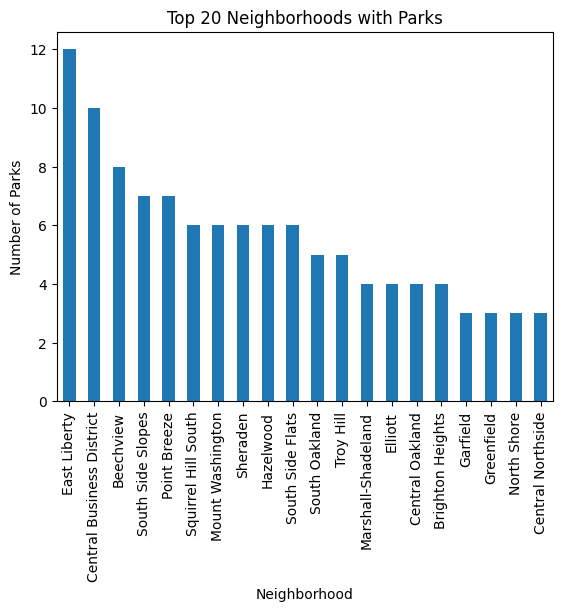

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

top20_neighborhood.plot(kind = 'bar', title = 'Top 20 Neighborhoods with Parks')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")

## Map
The following map shows the distribution of neighborhoods in Pittsburgh. Deeper color represents more parks.

<Axes: >

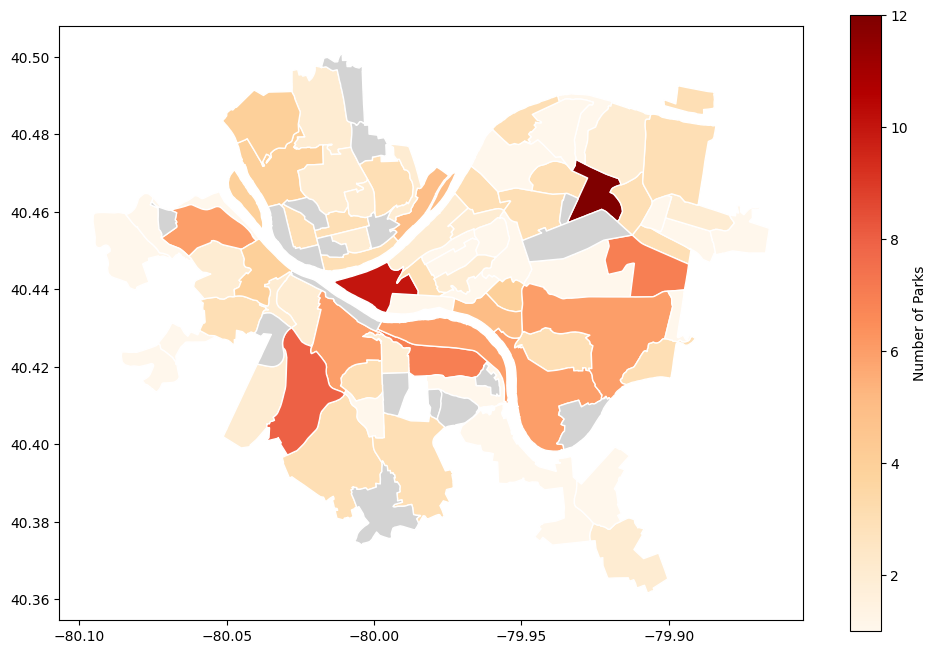

In [8]:
import geopandas

neighborhoods = geopandas.read_file("neighborhoods/neighborhoods.shp")
park_map = neighborhoods.merge(
    neighborhood,
    left_on='hood',
    right_index=True,
    how='left'
)
park_map[['hood','count','geometry']].head()

park_map.plot(column='count',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Parks"},
               figsize=(12, 8),
               missing_kwds={"color": "lightgrey"}
               )